# Individual Assignment M3.1 (Coding)
**OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------------------

In this assignment, you will try to replicate the Play Golf dataset/code on a familiar dataset - CA Housing! But we will simplify the dataset a bit and give a few candidate columns for you to choose from. You are only going to use a depth of one.

To help prepare you for the midterm, you will complete this assignment by coding like we did in class. Next week, you will work it all out by hand (your numbers should match - that's how you know you did it right!). 

For this assignment, please submit **only** your completed script as .ipynb file.

This assignment is to be completed ON YOUR OWN - any plagiarism (i.e. direct copying codes, comments or submitting work that is not your own) will be dealt with according to Graduate School policy.

## Rubric:
* **100 pts:** Student has a clearly labeled notebook with no errors. Your headers should match the class example, but the numbers and symbols should be updated to match your example. Calculations for reduction in global standard deviation mimic class example and are correct. Plot the tree at the end with a max_depth=1 to ensure you got the same answer. 
* **80 pts:** A minor error is carried throughout the notebook, lack of comments or headers, and/or no decision tree visualization to check the work.
* **50 pts:** Major error, sloppy code and/or no decision tree visualization to check the work.

## Data Prep
Read in the CA Housing data and subset a few columns to make things more intuitive.



In [31]:
# DO NOT CHANGE THIS! 
theSeed = 1234567 # everybody will use this value, everybody will get the same answer!

In [32]:
import pandas as pd
import numpy as np

# read in the CA Housing data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.info() # note that this version only has a few columns (RM, LSTAT, PTRATIO and MEDV)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


So that you don't have to evalaute ALL possible combinations - let's recode `housing_median_age`, `total_rooms` and `median_income` based on median values.

In [33]:
df = df[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']]
df

,housing_median_age,total_rooms,median_income,median_house_value
0,15.0,5612.0,1.4936,66900.0
1,19.0,7650.0,1.8200,80100.0
2,17.0,720.0,1.6509,85700.0
3,14.0,1501.0,3.1917,73400.0
4,20.0,1454.0,1.9250,65500.0
...,...,...,...,...
16995,52.0,2217.0,2.3571,111400.0
16996,36.0,2349.0,2.5179,79000.0
16997,17.0,2677.0,3.0313,103600.0
16998,19.0,2672.0,1.9797,85800.0


In [34]:
# I added this part additionally to findout the criteria of each split
a=np.median(df['housing_median_age'])
b=np.median(df['total_rooms'])
c=np.median(df['median_income'])

print('Median value of Housing median age: ', a)  #29
print('Median value of Total Rooms: ', b) #2127
print('Median value of median income: ', c) #3.5446

Median value of Housing median age:  29.0
Median value of Total Rooms:  2127.0
Median value of median income:  3.5446


In [35]:
df['housing_median_age'] = np.where(df['housing_median_age'] > np.median(df['housing_median_age']), 1, 0)
df['total_rooms'] = np.where(df['total_rooms'] > np.median(df['total_rooms']), 1, 0)
df['median_income'] = np.where(df['median_income'] > np.median(df['median_income']), 1, 0)
df # we leave the target variable as is, we are doing regression!

,housing_median_age,total_rooms,median_income,median_house_value
0,0,1,0,66900.0
1,0,1,0,80100.0
2,0,0,0,85700.0
3,0,0,0,73400.0
4,0,0,0,65500.0
...,...,...,...,...
16995,1,1,0,111400.0
16996,1,1,0,79000.0
16997,0,1,0,103600.0
16998,0,1,0,85800.0


In [36]:
# sample 10 rows
df = df.sample(n=10, random_state=theSeed)

# clean up your dataframe
df.reset_index(inplace=True)
del df['index']

# check your work
df

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
1,0,0,1,227800.0
2,1,1,1,223500.0
3,0,1,0,272800.0
4,0,1,1,167600.0
5,0,1,1,294600.0
6,0,0,0,75300.0
7,0,1,1,183200.0
8,0,0,0,93400.0
9,1,1,1,168800.0


# Global Standard Devation($\Phi =79604.38 $)


In [37]:
np.mean(df['median_house_value'])  #204400

204400.0

In [8]:
# The global standard deviation of median house value is 79604.38
np.std(df['median_house_value']) 

79604.38430136873

# The first split candidates

## 1.Housing median age

- Numerical variables are converted to binary variables based on the median value. 'Housing median age' is converted into 1 and 0 according to the median value of 29. 
 

### Housing Median Age > 29 ($\sigma= 70052.02$ , $n = 3$)

In [9]:
m_ageL=df[df.housing_median_age == 1]
m_ageL 

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
2,1,1,1,223500.0
9,1,1,1,168800.0


In [10]:
AVG_m_ageL=np.mean(m_ageL['median_house_value'])
SD_m_ageL=np.std(m_ageL['median_house_value'])

print(AVG_m_ageL) #243100
print(SD_m_ageL) #70052.028

243100.0
70052.02828374541


### Housing Median Age $\leq$  29 ($\sigma= 77669.67$ , $n =7 $)

In [11]:
m_ageS=df[df.housing_median_age == 0]
m_ageS

,housing_median_age,total_rooms,median_income,median_house_value
1,0,0,1,227800.0
3,0,1,0,272800.0
4,0,1,1,167600.0
5,0,1,1,294600.0
6,0,0,0,75300.0
7,0,1,1,183200.0
8,0,0,0,93400.0


In [12]:
AVG_m_ageS=np.mean(m_ageS['median_house_value'])
SD_m_ageS=np.std(m_ageS['median_house_value'])

print(AVG_m_ageS)  # 187814.2857142857
print(SD_m_ageS)   # 77669.67469577132

187814.2857142857
77669.67469577132


### Summary ($\phi =4220 $)

weighted standard deviation for median house value = $(3/10) \times 70052.02 +(7/10)  \times  77669.67 = 75384.375$

Standard deviation reduction for median house value =$ \phi = 79604.38- 75384.375 = 4220$

In [13]:
# Weighted standard deviation 
(3/10)*70052.02 + (7/10)*77669.67 

75384.375

In [14]:
# Standard deviation reduction 
79604.38- 75384.375

4220.005000000005

## 2.Total rooms

- Numerical variables are converted to binary variables based on the median value. 'Total Rooms' is converted into 1 and 0 according to the median value of 2127. 

### Total Rooms $\gt$ 2127 ($\sigma= 62249.27$ , $n = 7$)


In [15]:
t_roomsL=df[df.total_rooms == 1]
t_roomsL

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
2,1,1,1,223500.0
3,0,1,0,272800.0
4,0,1,1,167600.0
5,0,1,1,294600.0
7,0,1,1,183200.0
9,1,1,1,168800.0


In [16]:
AVG_t_roomsL=np.mean(t_roomsL['median_house_value'])
SD_t_roomsL=np.std(t_roomsL['median_house_value'])

print(AVG_t_roomsL) #235357.14285714287
print(SD_t_roomsL) #62249.265219825385

235357.14285714287
62249.265219825385


### Total Rooms $\leq$ 2127 ($\sigma=68025.50 $ , $n = 3$)

In [17]:
t_roomsS=df[df.total_rooms == 0]
t_roomsS

,housing_median_age,total_rooms,median_income,median_house_value
1,0,0,1,227800.0
6,0,0,0,75300.0
8,0,0,0,93400.0


In [18]:
AVG_t_roomsS=np.mean(t_roomsS['median_house_value'])
SD_t_roomsS=np.std(t_roomsS['median_house_value'])

print(AVG_t_roomsS) #132166.66666666666
print(SD_t_roomsS) #68025.50175403993

132166.66666666666
68025.50175403993


### Summary ($\phi = 15622.24$)

weighted standard deviation for median house value = $(7/10) \times 62249.27 +(3/10)  \times  68025.50 = 63982.14 $

Standard deviation reduction for median house value =$ \phi = 79604.38- 63982.14 = 15622.24$

In [19]:
# Weighted standard deviation 
(7/10)*62249.27 + (3/10)*68025.5

63982.138999999996

In [20]:
79604.38-63982.14

15622.240000000005

## 3.Median Income
 Numerical variables are converted to binary variables based on the median value. 'Median Income' is converted into 1 and 0 according to the median value of 3.54. 

### Median Income $\gt$ 3.54 ($\sigma= 60345.025$ , $n = 7$)

In [21]:
m_incL=df[df.median_income == 1]
m_incL

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
1,0,0,1,227800.0
2,1,1,1,223500.0
4,0,1,1,167600.0
5,0,1,1,294600.0
7,0,1,1,183200.0
9,1,1,1,168800.0


In [22]:
AVG_m_incL=np.mean(m_incL['median_house_value'])
SD_m_incL=np.std(m_incL['median_house_value'])

print(SD_m_incL) #60345.02498811585

60345.02498811585


### Median Income $\leq$ 3.54 ($\sigma= 89142.97 $ , $n = 3$)

In [23]:
m_incS=df[df.median_income == 0]
m_incS

,housing_median_age,total_rooms,median_income,median_house_value
3,0,1,0,272800.0
6,0,0,0,75300.0
8,0,0,0,93400.0


In [24]:
AVG_m_incS=np.mean(m_incS['median_house_value'])
SD_m_incS=np.std(m_incS['median_house_value'])

print(SD_m_incS) #89142.96881352387

89142.96881352387


### Summary ($\phi = 10620.06$)

weighted standard deviation for median house value = $(7/10) \times 60345.025 +(3/10)  \times  89142.67 =68984.32  $

Standard deviation reduction for median house value =$ \phi = 79604.38- 63984.32 = 10620.06$

In [25]:
(7/10)*60345.025+(3/10)*89142.67  #68984.3185

68984.3185

In [26]:
79604.38-68984.3185  #10620.06150000001

10620.06150000001

#First split is Total Rooms 
- Total rooms has the largest standard deviation deduction of $\phi=15622.24 $
- This means that total rooms is the best candidate to split this dataset.


#Visualization of the first_split tree

In [27]:
df

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
1,0,0,1,227800.0
2,1,1,1,223500.0
3,0,1,0,272800.0
4,0,1,1,167600.0
5,0,1,1,294600.0
6,0,0,0,75300.0
7,0,1,1,183200.0
8,0,0,0,93400.0
9,1,1,1,168800.0


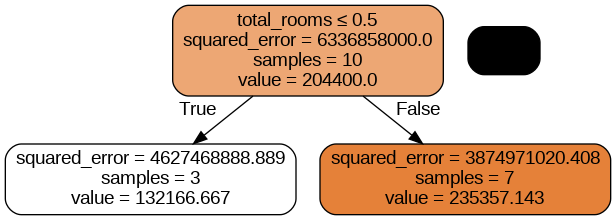

In [28]:
# import module
from sklearn.tree import DecisionTreeRegressor

# Specify X and y 
y=df['median_house_value']
X=df[['housing_median_age','total_rooms','median_income']]

# Make a variable to strore the general model
DTR= DecisionTreeRegressor(max_depth=1, max_leaf_nodes=2)

# Fit the model 
DTR=DTR.fit(X,y)

#Show the tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data=StringIO()
export_graphviz(DTR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [29]:
np.sqrt(4627468888)

68025.50174750642

In [30]:
np.sqrt(3874971020.408)

62249.26521982408